## Môn: Nhập môn máy học
 * Bài thực hành số 3
 * Sinh viên: Huỳnh Thị Bảo Trân
 * MSSV: 19110482

# Lab 03: Logistic Regression

### 1.1 Data

Data dùng trong bài thực hành này gồm chiều dài dọc gân lá ($x_1$) và chiều ngang gân lá ($x_2$) và loại lá ($y$, có giá trị 0 hoặc 1).


In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv('train.csv')
train.head()

,x1,x2,label
0,56.130749,61.006677,0
1,49.871157,43.687531,0
2,53.868769,62.477624,0
3,53.558846,52.686585,0
4,55.382830,52.925488,0


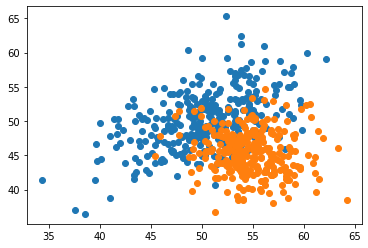

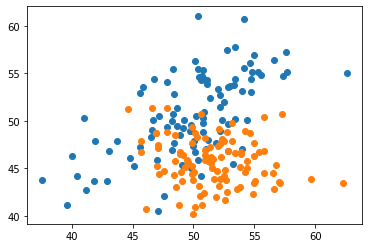

In [162]:
x1_train = train['x1'].values
x2_train = train['x2'].values
y_train = train['label'].values

plt.scatter(x1_train[y_train == 0], x2_train[y_train == 0])
plt.scatter(x1_train[y_train == 1], x2_train[y_train == 1])


plt.figure()
valid = pd.read_csv('valid.csv')
x1_valid = valid['x1'].values
x2_valid = valid['x2'].values
y_valid = valid['label'].values
plt.scatter(x1_valid[y_valid == 0], x2_valid[y_valid == 0])
plt.scatter(x1_valid[y_valid == 1], x2_valid[y_valid == 1])


### 1.2 Binary Logistic Linear Regression
Ta muốn dựa vào 2 chiều của lá, phân biệt giữa loại lá 1 và loại lá 2. Cụ thể, với $x = (x_1,x_2, 1)$ là input, ta muốn đoán một phân phối
$$ P_\theta(c|x),c = 0, 1 $$
với $\theta = (\theta_1, \theta_2, \theta_3)$ là tham số.

Trong binary losgistic linear regression, ta giả thuyết
$$ P_\theta(c=0|x) = \frac{1}{1+ e^{-\theta_1 x_1 - \theta_2 x_2 - \theta_3}} = \frac{1}{1+ e^{-\theta \cdot x}} \text{ và } P_\theta(c=1|x) = 1 - P_\theta(c=0|x)$$

Giờ cần tìm $\theta = (\theta_1, \theta_2, \theta_3)$ sao cho 
$$ L = \frac{1}{N} \sum_{x, y} - (1-y) \log P_\theta(c=0|x) - y \log P_\theta(c=1|x) = \frac{1}{N} \sum_{x, y} - (1-y) \log \frac{1}{1+ e^{-\theta \cdot x}} - y \log \frac{e^{-\theta \cdot x}}{1+ e^{-\theta \cdot x}} $$
đạt giá trị nhỏ nhất. 

Nếu dùng Gradient Descent:
$$ \frac{\partial L}{\partial \theta_1} = \frac{1}{N} \sum_{x, y} e^{-\theta \cdot x}  \left( \frac{1}{1+e^{-\theta \cdot x}} - \frac{y}{e^{-\theta \cdot x}}\right) (-x_1)$$
$$ \frac{\partial L}{\partial \theta_2} = \frac{1}{N} \sum_{x, y} e^{-\theta \cdot x}  \left( \frac{1}{1+e^{-\theta \cdot x}} - \frac{y}{e^{-\theta \cdot x}}\right) (-x_2)$$
$$ \frac{\partial L}{\partial \theta_3} = \frac{1}{N} \sum_{x, y} e^{-\theta \cdot x}  \left( \frac{1}{1+e^{-\theta \cdot x}} - \frac{y}{e^{-\theta \cdot x}}\right) (-1) $$

In [163]:
## normalization
x1_mean = np.mean(x1_train)
x1_std = np.std(x1_train)
x2_mean = np.mean(x2_train)
x2_std = np.std(x2_train)

x1_train = (x1_train - x1_mean)/ x1_std
x2_train = (x2_train - x2_mean)/ x2_std

x1_valid = (x1_valid - x1_mean)/ x1_std
x2_valid = (x2_valid - x2_mean)/ x2_std

In [164]:
theta1, theta2, theta3 = 0.0, 0.0, 0.0
lrn_rate = 0.001
n_iters = 300000

best_theta = None      #biến để lưu tham số mà có accuracy tốt nhất trên tập valid
best_val_acc = -1.0

for ii in range(n_iters):
    exppp = np.exp(-theta1*x1_train -theta2*x2_train-theta3)
    common = exppp*(1/(1+exppp) - y_train/exppp)
    dL_dtheta1 = np.mean(common*(-x1_train))
    dL_dtheta2 = np.mean(common*(-x2_train))
    dL_dtheta3 = np.mean(common*(-1))
    theta1 = theta1 - lrn_rate * dL_dtheta1
    theta2 = theta2 - lrn_rate * dL_dtheta2
    theta3 = theta3 - lrn_rate * dL_dtheta3
    
    if ii % 10000 == 0:
        ## predict
        pred_proba_train = 1/(1 + np.exp(-theta1 * x1_train - theta2 * x2_train - theta3))            ## xác suất label 0
        train_loss = np.mean(-(1 - y_train) * np.log(pred_proba_train) - y_train*np.log(1 - pred_proba_train))
        train_acc = np.mean(y_train == (pred_proba_train < 0.5).astype(int))                ## convert xác suất đoán đc ra nhãn rồi tính accuracy
        
        
        pred_proba_valid = 1/(1 + np.exp(-theta1 * x1_valid - theta2 * x2_valid - theta3))
        valid_loss = np.mean(-(1 - y_valid)*np.log(pred_proba_valid) - y_valid * np.log(1 - pred_proba_valid))
        valid_acc = np.mean(y_valid == (pred_proba_valid < 0.5).astype(int))
        
        if valid_acc > best_val_acc:
            ## lưu tham số tốt nhất
            best_val_acc = valid_acc
            best_theta = theta1, theta2, theta3
        
        print('Iter {} - loss {:.4f} - acc {:.4f} - val_loss {:.4f} - val_acc {:.4f}'.format(ii, train_loss, train_acc, valid_loss, valid_acc))

theta1, theta2, theta3 = best_theta
train_acc = np.mean(y_train == (1/(1+np.exp(-theta1*x1_train-theta2*x2_train-theta3)) < 0.5).astype(int))
valid_acc = np.mean(y_valid == (1/(1+np.exp(-theta1*x1_valid-theta2*x2_valid-theta3)) < 0.5).astype(int))
print('Accuracy on train:', train_acc)
print('Accuracy on valid:', valid_acc)

Iter 0 - loss 0.6930 - acc 0.8567 - val_loss 0.6931 - val_acc 0.7750
Iter 10000 - loss 0.3772 - acc 0.8567 - val_loss 0.4906 - val_acc 0.7750
Iter 20000 - loss 0.3462 - acc 0.8567 - val_loss 0.4869 - val_acc 0.7750
Iter 30000 - loss 0.3368 - acc 0.8567 - val_loss 0.4921 - val_acc 0.7750
Iter 40000 - loss 0.3329 - acc 0.8567 - val_loss 0.4975 - val_acc 0.7750
Iter 50000 - loss 0.3310 - acc 0.8567 - val_loss 0.5021 - val_acc 0.7750
Iter 60000 - loss 0.3301 - acc 0.8567 - val_loss 0.5057 - val_acc 0.7750
Iter 70000 - loss 0.3296 - acc 0.8567 - val_loss 0.5085 - val_acc 0.7800
Iter 80000 - loss 0.3293 - acc 0.8567 - val_loss 0.5107 - val_acc 0.7800
Iter 90000 - loss 0.3292 - acc 0.8567 - val_loss 0.5124 - val_acc 0.7800
Iter 100000 - loss 0.3291 - acc 0.8567 - val_loss 0.5137 - val_acc 0.7750
Iter 110000 - loss 0.3290 - acc 0.8567 - val_loss 0.5147 - val_acc 0.7750
Iter 120000 - loss 0.3290 - acc 0.8567 - val_loss 0.5155 - val_acc 0.7750
Iter 130000 - loss 0.3290 - acc 0.8567 - val_loss 0.

### 1.3 Sklearn

In [165]:
from sklearn.linear_model import LogisticRegression

X_train = np.concatenate([x1_train.reshape(-1, 1), x2_train.reshape(-1, 1)], axis = -1)
X_valid = np.concatenate([x1_valid.reshape(-1, 1), x2_valid.reshape(-1, 1)], axis = -1)

lr = LogisticRegression().fit(X_train, y_train)
print('Sklearn accuracy on train:', np.mean(y_train == lr.predict(X_train)))
print('Sklearn accuracy on valid:', np.mean(y_valid == lr.predict(X_valid)))

Sklearn accuracy on train: 0.8566666666666667
Sklearn accuracy on valid: 0.78


## 2 Bài tập


### 2.1 Multi-class Logistic Linear Regression

Ta muốn dựa vào 2 chiều của lá, phân biệt giữa 3 loại lá. Cụ thể, với  $x=(x_1, x_2, 1)$  là input, ta muốn đoán một phân phối
$$ P_\theta(c|x), c=0,1,2 $$

Đặt $\theta_0 = (\theta_{01}, \theta_{02}, \theta_{03}), \theta_1 = (\theta_{11}, \theta_{12}, \theta_{13})$ và $\theta_2 = (\theta_{21}, \theta_{22}, \theta_{23})$. Giả thuyết
$$ P_\theta(c|x) = \frac{e^{\theta_c \cdot x}}{\sum_{c'=0}^2 e^{\theta_{c'} \cdot x}},c = 0, 1, 2.$$

Gọi $y = (y_0, y_1, y_2)$ là one-hot vector biểu thị loại lá tương ứng với $x$. Ta Tìm các $\theta$ sao cho
$$ L = \frac{1}{N} \sum_{x,y} - y_0 \log P_\theta(0|x) -  y_1 \log P_\theta(1|x) - y_2 \log P_\theta(2|x) $$
đạt giá trị nhỏ nhất.

Tương tự như hưỡng dẫn, giải bài toán trên bằng gradient descent.

Đồng thời so sánh kết quả với sklearn.

In [166]:
train = pd.read_csv('bt_train.csv')
train.head()

,x1,x2,label
0,55.808717,54.602061,0
1,50.882672,52.736342,0
2,53.196444,44.208365,0
3,54.727839,60.406845,0
4,49.771372,48.405605,0


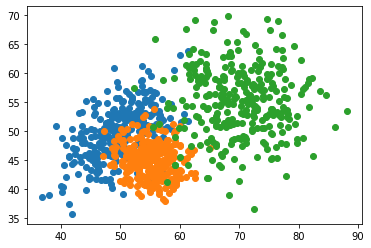

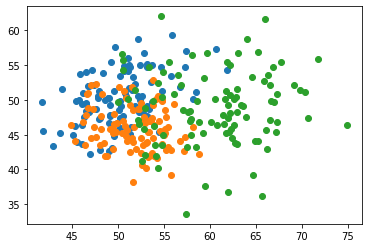

In [167]:
x1_train = train['x1'].values
x2_train = train['x2'].values
y_train = train['label'].values

plt.scatter(x1_train[y_train == 0], x2_train[y_train == 0])
plt.scatter(x1_train[y_train == 1], x2_train[y_train == 1])
plt.scatter(x1_train[y_train == 2], x2_train[y_train == 2])

plt.figure()
valid = pd.read_csv('bt_valid.csv')
x1_valid = valid['x1'].values
x2_valid = valid['x2'].values
y_valid = valid['label'].values

plt.scatter(x1_valid[y_valid == 0], x2_valid[y_valid == 0])
plt.scatter(x1_valid[y_valid == 1], x2_valid[y_valid == 1])
plt.scatter(x1_valid[y_valid == 2], x2_valid[y_valid == 2])

In [168]:
## normalization
x1_mean = np.mean(x1_train)
x1_std = np.std(x1_train)
x2_mean = np.mean(x2_train)
x2_std = np.std(x2_train)

x1_train = (x1_train - x1_mean)/ x1_std
x2_train = (x2_train - x2_mean)/ x2_std

x1_valid = (x1_valid - x1_mean)/ x1_std
x2_valid = (x2_valid - x2_mean)/ x2_std

In [169]:
one_hot = pd.get_dummies(y_train)
Y_train = np.array(one_hot).T
Y_train

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

In [170]:
one_hot = pd.get_dummies(y_valid)
Y_valid = np.array(one_hot).T
Y_valid.shape

(3, 300)

In [171]:
Z = np.array([x1_train, x2_train]).T
X_train = np.concatenate([Z, np.ones((x1_train.shape[0], 1))], axis = -1)
X_train

array([[-0.24889612,  0.74760804,  1.        ],
       [-0.74985907,  0.44945807,  1.        ],
       [-0.5145559 , -0.91335007,  1.        ],
       ...,
       [ 0.61938387,  1.6949654 ,  1.        ],
       [ 0.93715397,  0.24593182,  1.        ],
       [ 1.31587098,  0.87455223,  1.        ]])

In [172]:
z = np.array([x1_valid, x2_valid]).T
X_valid = np.concatenate([z, np.ones((x1_valid.shape[0], 1))], axis = -1)
X_valid.shape

(300, 3)

In [173]:
theta = np.zeros([3, 3])
lrn_rate = 0.001
n_iters = 300000

best_theta = None
best_val_acc = -1.0
dL_dtheta = tuple()

for ii in range(n_iters):
    exppp = np.exp(np.matmul(X_train, theta[-1]))
    sumexppp = np.sum(exppp, axis = 0)
    common = exppp/ sumexppp.reshape(-1, 1)
    dL_dtheta = np.mean((-Y_train - common).T*X_train, axis = 0).reshape(-1, 1)
    theta = theta - lrn_rate * dL_dtheta
    
    if ii % 10000 == 0:
        pred_proba_train = np.exp(np.matmul(X_train, theta[-1]))/ np.sum(np.exp(np.matmul(X_train, theta[-1])), axis = 0).reshape(-1, 1)
        train_loss = np.mean(-Y_train.dot(np.log(pred_proba_train.reshape(-1, 1))), axis = 0)
        train_acc = np.mean(Y_train.reshape(-1) == np.argmax(pred_proba_train, axis = 1))
        
        pred_proba_valid = np.exp(np.matmul(X_valid, theta[-1]))/ np.sum(np.exp(np.matmul(X_valid, theta[-1])), axis = 0).reshape(-1, 1)
        valid_loss = np.mean(-Y_valid.dot(np.log(pred_proba_valid.reshape(-1, 1))), axis = 0)
        valid_acc = np.mean(Y_valid.reshape(-1) == np.argmax(pred_proba_valid, axis = 1))
        
        if valid_acc > best_val_acc:
            best_val_acc = valid_acc
            best_theta = theta

theta = best_theta
train_acc = np.mean(Y_train.reshape(-1) == np.argmax(exppp/ sumexppp.reshape(-1, 1), axis = 1))
valid_acc = np.mean(Y_valid.reshape(-1) == np.argmax(exppp/ sumexppp.reshape(-1, 1), axis = 1))
print('Accuracy on train:', train_acc)
print('Accuracy on valid:', valid_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


Accuracy on train: 0.6666666666666666
Accuracy on valid: 0.6666666666666666


In [174]:
from sklearn.linear_model import LogisticRegression

X_train = np.concatenate([x1_train.reshape(-1, 1), x2_train.reshape(-1, 1)], axis = -1)
X_valid = np.concatenate([x1_valid.reshape(-1, 1), x2_valid.reshape(-1, 1)], axis = -1)

lr = LogisticRegression().fit(X_train, y_train)
print('Sklearn accuracy on train:', np.mean(y_train == lr.predict(X_train)))
print('Sklearn accuracy on valid:', np.mean(y_valid == lr.predict(X_valid)))

Sklearn accuracy on train: 0.8866666666666667
Sklearn accuracy on valid: 0.6233333333333333
